**E-COMMERCE SERVICE REVIEW - SENTIMENT ANALYSIS**

Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Processing**

In [ ]:
#Load the data

data = pd.read_csv("/content/reviews1.csv", encoding ='ISO-8859-1')

In [ ]:
data.shape

(2880, 7)

In [ ]:
data.head()

,Username,Total reviews,Location,Date,Review,Rating,feeling
0,Richard,37K reviews,US,2025-02-14T22:43:05.000Z,Just when you thought Customer Disservice coul...,1,anger
1,Ronald Mitzel,3.6K reviews,US,2025-02-14T06:03:30.000Z,Worst delivery of any store in the United Stat...,1,anger
2,Armando Garcia Luna,14K reviews,US,2025-02-12T03:01:21.000Z,Poor customer service & ScamPoor customer serv...,1,anger
3,Jessica Laurie,3reviews,US,2025-02-14T03:06:45.000Z,WalmartWalmart. Where do I even begin? It's ...,1,anger
4,Mike Doyle,1review,US,2025-02-14T21:37:21.000Z,I bought a cellphone from an OSLI bought a cel...,1,anger


In [ ]:
column_names = ['username', 'totalreviews', 'location', 'date', 'review', 'rating', 'feeling']
data = pd.read_csv("/content/reviews1.csv", names = column_names, encoding ='ISO-8859-1')

In [ ]:
data.shape

(2881, 7)

In [ ]:
data.head()

,username,totalreviews,location,date,review,rating,feeling
0,Username,Total reviews,Location,Date,Review,Rating,feeling
1,Richard,37K reviews,US,2025-02-14T22:43:05.000Z,Just when you thought Customer Disservice coul...,1,anger
2,Ronald Mitzel,3.6K reviews,US,2025-02-14T06:03:30.000Z,Worst delivery of any store in the United Stat...,1,anger
3,Armando Garcia Luna,14K reviews,US,2025-02-12T03:01:21.000Z,Poor customer service & ScamPoor customer serv...,1,anger
4,Jessica Laurie,3reviews,US,2025-02-14T03:06:45.000Z,WalmartWalmart. Where do I even begin? It's ...,1,anger


In [ ]:
data.isnull().sum()

,0
username,0
totalreviews,0
location,0
date,0
review,0
rating,0
feeling,0
stemmed_content,0


In [ ]:
data['feeling'].value_counts()

,count
feeling,
anger,2309
joy,248
happy,162
sad,161
feeling,1


**Stemming**

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [ ]:
print(data.columns)

Index(['username', 'totalreviews', 'location', 'date', 'review', 'rating',
       'feeling'],
      dtype='object')


In [ ]:
data['stemmed_content'] = data['review'].astype(str).apply(stemming)

In [ ]:
data.head()

,username,totalreviews,location,date,review,rating,feeling,stemmed_content
0,Username,Total reviews,Location,Date,Review,Rating,feeling,review
1,Richard,37K reviews,US,2025-02-14T22:43:05.000Z,Just when you thought Customer Disservice coul...,1,anger,thought custom disservic worsei use think tie ...
2,Ronald Mitzel,3.6K reviews,US,2025-02-14T06:03:30.000Z,Worst delivery of any store in the United Stat...,1,anger,worst deliveri store unit statesi paid month d...
3,Armando Garcia Luna,14K reviews,US,2025-02-12T03:01:21.000Z,Poor customer service & ScamPoor customer serv...,1,anger,poor custom servic scampoor custom servic made...
4,Jessica Laurie,3reviews,US,2025-02-14T03:06:45.000Z,WalmartWalmart. Where do I even begin? It's ...,1,anger,walmartwalmart even begin like circu day park ...


In [ ]:
print(data['stemmed_content'])

0                                                  review
1       thought custom disservic worsei use think tie ...
2       worst deliveri store unit statesi paid month d...
3       poor custom servic scampoor custom servic made...
4       walmartwalmart even begin like circu day park ...
                              ...                        
2876    reason gave one star reason gave one star let ...
2877    employe physic verbal threaten today edit apri...
2878    ladi return candi ladi return candi problem tu...
2879    understand problemsh understand problem theref...
2880    order cake birthday order cake birthday hallow...
Name: stemmed_content, Length: 2881, dtype: object


In [ ]:
print(data['feeling'])

0       feeling
1         anger
2         anger
3         anger
4         anger
         ...   
2876      anger
2877      anger
2878      anger
2879      anger
2880      anger
Name: feeling, Length: 2881, dtype: object


In [ ]:
X = data['stemmed_content'].values
Y = data['feeling'].values

In [ ]:
print(X)

['review'
 'thought custom disservic worsei use think tie comcast worst custom disservic question moot winner walmart foreign cd rep idiot chat bot exhaust telephon menu system bent prevent access carbon life form inscrut web site design execut eighth grade comput nerd array problem everyth goe plan never walmart certainli place shop ok groceri jumbo quantiti larger profit margin smaller unit woe unto thing like best laid plan mice men go awri breathtak incompet peopl softwar organ strain one credul believ experi withhold judgement date experi februari'
 'worst deliveri store unit statesi paid month deliveri servic sometim deliveri come time come sometim item miss call walmart tell act like fault play victim incompet employe order lettuc recent let head lettuc black rot dare send take advantag senior especi know get store depend lousiest deliveri servic unit state compani would rather pay month groceri deliv know go get order done walmart absolut worstdat experi februari'
 ...
 'ladi r

In [ ]:
print(Y)

['feeling' 'anger' 'anger' ... 'anger' 'anger' 'anger']


Split the data into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2881,) (2304,) (577,)


In [ ]:
print(X_train)

['terribl custom servicewalmart delay deliveri twice left packag outsid lock door late christma eve needless say stolen custom servic abysm refus replac refund advis make report polic seriou date experi decemb'
 'buy walmartdon buy walmart sold defect macbook air laptop lost stuck broken laptop refus process refund even though explain happen date experi novemb'
 'excel custom servic ethanexcel custom servic ethan happili receiv packag deliveri curbsid date experi august'
 ...
 'bought air condition linebought air condition line app work hr use walmart back product sold date experi august'
 'famili importantcc xxxorder robot vacuum arriv american flag nake girl sister open church church group nun priest embarrass live ri live tn brought tee shirt nake call pervert block phone e mail social media tri contact corpor fix problem get run around sent anoth robot vacuum sent back put contact seem walmart ethic care custom famili money want walmart send letter explain happen sister talk holida

In [ ]:
print(X_test)

['never issu date experi septemb'
 'ruin christma septemb place order kid kraft modern outdoor swing set purchas christma present children ship two box arriv place septemb box place garag wait patient closer christma set swing set decemb husband began open box start process put swing set togeth notic receiv two box exact part two box miss box immedi got phone call walmart custom servic pleasur speak naja promptli inform us avail box order could replac one duplic box box would arriv later monday decemb would need return one box walmart would ship replac order box christma guarante would receiv part abl build swing set explain receiv box would send box back ask refund decemb receiv email state return receiv walmart would refund money obviou reason upset receiv box promis money refund card longer activ multipl phone call live chat custom servic husband explain situat help receiv box part cannot use build swing set told need call financi institut receiv refund walmart bill depart would con

Convert the textual data into numerical data

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 7468)	0.20423851100327187
  (0, 1106)	0.4341926462141787
  (0, 1229)	0.17949344090690467
  (0, 6017)	0.2614551433345408
  (0, 5089)	0.21206586463484575
  (0, 5371)	0.16429548517916054
  (0, 7002)	0.25044653602265027
  (0, 4219)	0.2021991087885986
  (0, 6502)	0.2317854780401269
  (0, 6544)	0.11808426158837206
  (0, 6385)	0.3047044855253129
  (0, 112)	0.33102453684315347
  (0, 4358)	0.4341926462141787
  (0, 1799)	0.07237854625609434
  (0, 2566)	0.060409811686410804
  (0, 4935)	0.16159233709723264
  (1, 5371)	0.1212007736310386
  (1, 4219)	0.14916227543295354
  (1, 1799)	0.05339365102432675
  (1, 2566)	0.04456431595374747
  (1, 5492)	0.36110195937364015
  (1, 5061)	0.20282946753470998
  (1, 5113)	0.1497793740003055
  (1, 7488)	0.1736558535453197
  (1, 6702)	0.14178622621756845
  :	:
  (2647, 927)	0.10183790161954742
  (2647, 4505)	0.1353534502649491
  (2647, 8030)	0.2530682474881016
  (2647, 3215)	0.13836130408004035
  (2647, 4957)	0.15188628751704691
  (2647, 1294)	0.29254582442712

In [ ]:
print(X_test)

  (0, 41)	0.11492198704016607
  (0, 74)	0.06629711809596232
  (0, 267)	0.07724176979468818
  (0, 408)	0.052162258498987875
  (0, 579)	0.13781207668643314
  (0, 1086)	0.0539259402985761
  (0, 1218)	0.27804816259026843
  (0, 1519)	0.20177650637613812
  (0, 1748)	0.13978816432784694
  (0, 1799)	0.022541312718696013
  (0, 1847)	0.05047121169022956
  (0, 2012)	0.11708342079373023
  (0, 2359)	0.05845736174594992
  (0, 2397)	0.0673458329948308
  (0, 2559)	0.07311954431771446
  (0, 2566)	0.01881381330432932
  (0, 2761)	0.060118228971991025
  (0, 2773)	0.0596021960553564
  (0, 3033)	0.0673458329948308
  (0, 3074)	0.05374678798690279
  (0, 3082)	0.0980507116838192
  (0, 3471)	0.06629711809596232
  (0, 3561)	0.12377834283433613
  (0, 3697)	0.43523002603478006
  (0, 4028)	0.10737499983628747
  :	:
  (659, 4701)	0.24637318267761457
  (659, 5233)	0.24158294316706005
  (659, 5456)	0.15624997163637167
  (659, 5751)	0.16296299253784394
  (659, 5803)	0.18575710835381015
  (659, 5998)	0.08232037878717502

Training the Machine Learning Model

## **Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Evaluation for the Logistic Regression Model (Accuracy Score & the Other Performance Metrics)

In [ ]:
# Accuracy score on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [ ]:
print('Accuracy Score on the training data:', training_data_accuracy)

Accuracy Score on the training data: 0.88


In [ ]:
# Accuracy score on the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [ ]:
print('Accuracy Score on the test data:', test_data_accuracy)

Accuracy Score on the test data: 0.8431372549019608


**Model accuracy = 84.3%**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

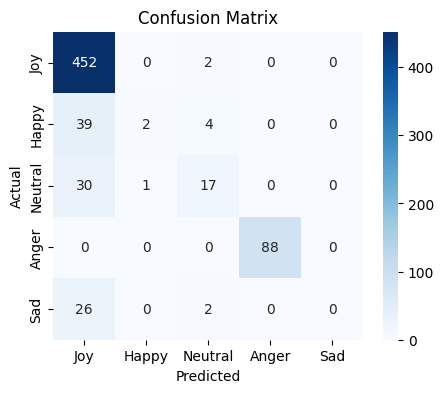

In [ ]:
# Confusion Matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Joy", "Happy", "Neutral","Anger", "Sad"], yticklabels=["Joy", "Happy", "Neutral","Anger", "Sad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report (Precision, Recall, F1-score)

print("\n Classification Report:\n")
print(classification_report(Y_test, Y_pred, target_names=["Joy", "Happy", "Neutral","Anger", "Sad"]))


 Classification Report:

              precision    recall  f1-score   support

         Joy       0.83      1.00      0.90       454
       Happy       0.67      0.04      0.08        45
     Neutral       0.68      0.35      0.47        48
       Anger       1.00      1.00      1.00        88
         Sad       0.00      0.00      0.00        28

    accuracy                           0.84       663
   macro avg       0.63      0.48      0.49       663
weighted avg       0.79      0.84      0.79       663



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Save the trained modle**

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Using the saved model for future predictions**

In [ ]:
# Loading the saved model

loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
X_new = X_test[333]
print(Y_test[333])

prediction = model.predict(X_new)
print(prediction)

anger
['anger']


In [ ]:
X_new = X_test[143]
print(Y_test[143])

prediction = model.predict(X_new)
print(prediction)

anger
['anger']


In [ ]:
X_new = X_test[666]
print(Y_test[666])

prediction = model.predict(X_new)
print(prediction)

IndexError: row index (666) out of range

In [ ]:
X_new = X_test[662]
print(Y_test[662])

prediction = model.predict(X_new)
print(prediction)

anger
['anger']


## LSTM Model

In [28]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [42]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Sample DataFrame (assuming 'feeling' contains text labels)
data = pd.DataFrame({'feeling': ['joy', 'happy', 'sad', 'anger', 'fear', np.nan, 'joy']})

# Define label mapping
label_mapping = {
    'joy': 0,
    'happy': 1,
    'sad': 2,
    'anger': 3,
    'fear': 4
}

# Replace text labels with corresponding integers
data['feeling'] = data['feeling'].map(label_mapping)

# Handle NaN values by assigning them to a default class (e.g., 'sad' -> 2)
data['feeling'] = data['feeling'].fillna(2).astype(int)  # Default to 'sad' (2)

# Verify the unique values to ensure correctness
print("Unique values in 'feeling':", data['feeling'].unique())

# One-hot encode the labels
num_classes = 5
Y = to_categorical(data['feeling'], num_classes=num_classes)

# Verify the output
print("One-hot encoded labels:\n", Y[:5])

Unique values in 'feeling': [0 1 2 3 4]
One-hot encoded labels:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [43]:
num_classes = 5
Y = to_categorical(data['feeling'], num_classes=num_classes)

In [45]:
print(data.columns)

Index(['feeling'], dtype='object')


In [47]:
print(data.head())
print(data.shape)

   feeling
0        0
1        1
2        2
3        3
4        4
(7, 1)


In [48]:
import pandas as pd

data = pd.read_csv("/content/reviews1.csv")
print(data.columns)

Index(['Username', 'Total reviews', 'Location', 'Date', 'Review', 'Rating',
       'feeling'],
      dtype='object')


In [50]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['Review'])
sequences = tokenizer.texts_to_sequences(data['Review'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_sequences, Y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [2880, 7]

In [52]:
print("Padded sequences shape:", padded_sequences.shape)  # Should be (num_samples, maxlen)
print("Labels (Y) shape:", Y.shape)  # Should be (num_samples, num_classes)
print("Dataset shape:", data.shape)  # Should match the number of rows

Padded sequences shape: (2880, 100)
Labels (Y) shape: (7, 5)
Dataset shape: (2880, 7)


In [53]:
print("Feeling column shape:", data['feeling'].shape)
print(data['feeling'].head())  # Check first few values

Feeling column shape: (2880,)
0    anger
1    anger
2    anger
3    anger
4    anger
Name: feeling, dtype: object


In [54]:
feeling_to_label = {'anger': 0, 'sad': 1, 'joy': 2, 'happy': 3, 'surprise': 4}
data['feeling'] = data['feeling'].map(feeling_to_label)

print(data['feeling'].head())

0    0
1    0
2    0
3    0
4    0
Name: feeling, dtype: int64


In [55]:
Y = to_categorical(data['feeling'], num_classes=num_classes)

print("Updated Labels (Y) shape:", Y.shape)

Updated Labels (Y) shape: (2880, 5)


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_sequences, Y, test_size=0.2, random_state=42)

In [58]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [62]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.7608 - loss: 1.1229 - val_accuracy: 0.7951 - val_loss: 0.7386
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8061 - loss: 0.7087 - val_accuracy: 0.7951 - val_loss: 0.7304
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8023 - loss: 0.7075 - val_accuracy: 0.7951 - val_loss: 0.6991
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.7986 - loss: 0.7039 - val_accuracy: 0.7951 - val_loss: 0.6843
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.8126 - loss: 0.6485 - val_accuracy: 0.7951 - val_loss: 0.6852
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.8134 - loss: 0.6412 - val_accuracy: 0.7951 - val_loss: 0.6884
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8004 - loss: 0.6747 - val_accuracy: 0.7951 - val_loss: 0.6978


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 100, 16)               │         255,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (32, 100, 64)               │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 100, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (32, 32)                    │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 16)                    │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 5)                     │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 868,097 (3.31 MB)

 Trainable params: 289,365 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 578,732 (2.21 MB)

**Performance Metrics**

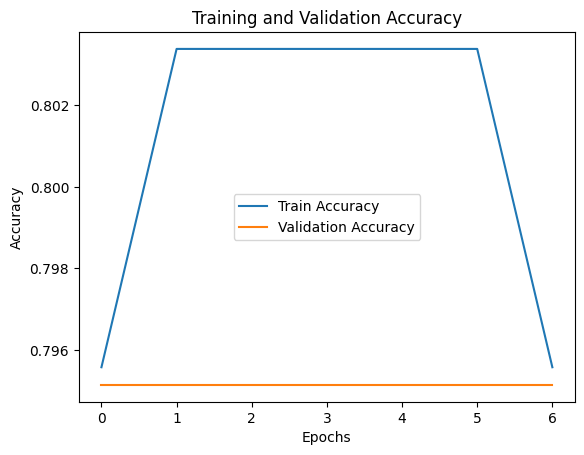

In [66]:
import matplotlib.pyplot as plt

# Accuracy

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [68]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8128 - loss: 0.6470
Test Loss: 0.6843
Test Accuracy: 0.7951


In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(Y_test, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [71]:
# Confusion matrix

cm = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[458   0   0   0]
 [ 30   0   0   0]
 [ 50   0   0   0]
 [ 38   0   0   0]]


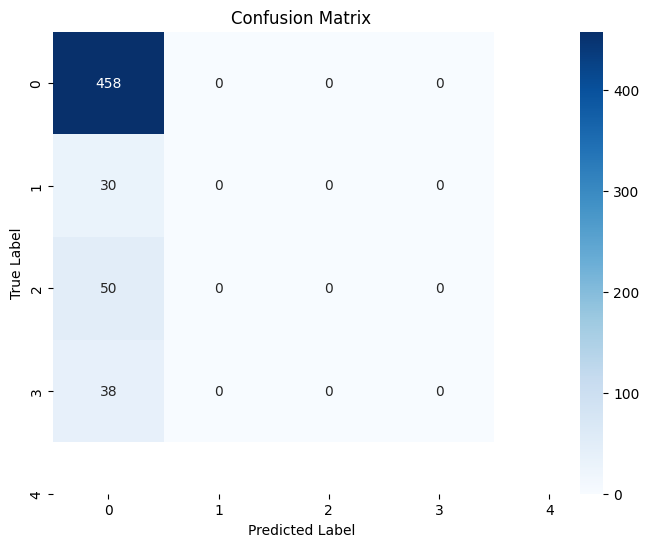

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
print("Unique classes in true labels:", np.unique(true_classes))
print("Unique classes in predicted labels:", np.unique(predicted_classes))

num_classes = len(np.unique(true_classes))

Unique classes in true labels: [0 1 2 3]
Unique classes in predicted labels: [0]


In [78]:
target_names = [str(i) for i in range(num_classes)]

report = classification_report(true_classes, predicted_classes, target_names=target_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       458
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        38

    accuracy                           0.80       576
   macro avg       0.20      0.25      0.22       576
weighted avg       0.63      0.80      0.70       576



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Here,
'anger': 0
'sad': 1
'joy': 2
'happy': 3

Save the trained Model

In [84]:
model.save('trained_model.keras')